In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import random
random.seed(2020)

get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
color_list = get_colors(20)

In [2]:
df = pd.read_pickle("../input/consumption_month.pkl")

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(df[df.columns[1:]].T)
X_minmax=minmax_scale.transform(df[df.columns[1:]].T).T
X_embedded = TSNE(n_components=2, random_state=2020).fit_transform(X_minmax)

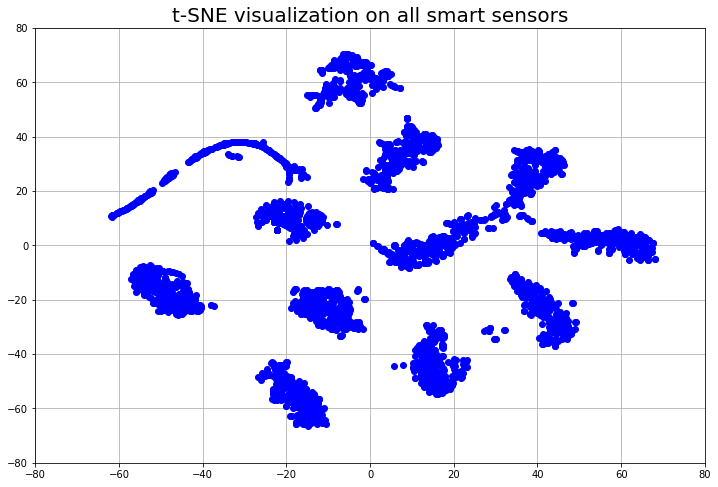

In [3]:
fig = plt.figure(figsize=(12, 8))
plt.plot(X_embedded[:,0], X_embedded[:,1], ".b", ms=12)
plt.title("t-SNE visualization on all smart sensors", fontsize=20)
plt.grid()
plt.xlim([-80,80])
plt.ylim([-80,80])
plt.show()

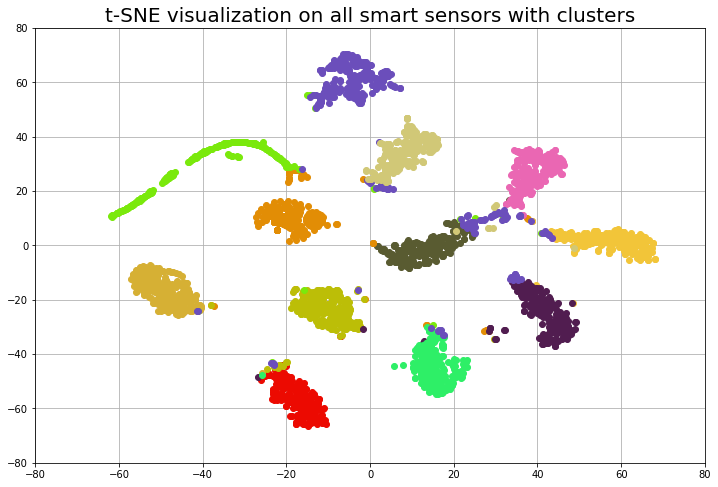

In [4]:
# Fuzzy C-Means (FCM) in MATLAB, here use K-Means for another option
cluster_num = 12
kmeans = KMeans(n_clusters=cluster_num, random_state=2020).fit(X_minmax)

fig = plt.figure(figsize=(12, 8))
for i in range(cluster_num):
    plt.plot(X_embedded[kmeans.labels_ == i][:,0], X_embedded[kmeans.labels_ == i][:,1], ".", color=color_list[i], ms=12)

plt.xlim([-80,80])
plt.ylim([-80,80])
plt.grid()
plt.title("t-SNE visualization on all smart sensors with clusters", fontsize=20)
plt.show()